# Análisis Sísmico

In [1]:
#Importar las librerías necesarias
%load_ext autoreload
%autoreload 2
import os
import sys
import numpy
sys.path.append(os.getcwd())
from lib import etabs_utils as etb
from lib import sismo_utils as sis
from lib import notebook_utils as ntb
#from mem import sismo_mem as smem
from ipywidgets import widgets
from IPython.display import display


In [2]:
_,SapModel = etb.connect_to_etabs()

In [3]:
sismo = ntb.Sismo()

# Parámetros de Sitio

## Zonificación
![Factor de Zonifiación](./images/factor_zona.png)

## Factor de Suelo
![Factor de Suelo](./images/factor_suelo.png)


## Periodos del suelo
![Periodos del Suelo](./images/periodos_suelo.png)

## Sistema Estructural
![Sistema Estructural](./images/sistemas_estructurales.png)

## Factor de Amplificación sísmica
![Factor de Amplificacion Sísmica](./images/amplificacion_sismica.png)

## Factor de Importancia
![Factor de Importancia](./images/factor_importancia.png)

In [4]:
sismo.ubicacion()

In [5]:
sismo.parametros_e30()

# Irregularidades

In [6]:
sismo.irregularidades_e30()

# Parámetros Sísmicos

In [7]:
sismo.show_params()


 Parámetros de sitio:
Factor de zona: 
    Z=0.45
Factor de Importancia: 
    U=1.00
Factor de Suelo: 
    S=1.05
Periodos del Suelo: 
    Tp=0.60
    Tl=2.00
Factor Básico de Reducción:
    Rox=7.00
    Roy=7.00
Irregularidad en planta:
    Ip=1.00
Irregularidad en altura:
    Ia=1.00
Factor de Reducción:
    Rx=7.00
    Ry=7.00



# Cargas Sísmicas

In [8]:
sismo.select_loads(SapModel)

# Selección del Piso Base

In [9]:
sismo.select_base_story(SapModel)

Dropdown(description='Piso Base', options=('Story1', 'Story2', 'Story3'), style=DescriptionStyle(description_w…

# Periodos Modales

In [10]:
sismo.ana_modal(SapModel,report=True)


Análisis Modal:
Masa Participativa X: 1.00
Masa Participativa Y: 1.00
Periodo y Masa Participativa X: Tx=0.353, Ux=0.863
Periodo y Masa Participativa Y: Ty=0.267, Uy=0.871


,Mode,Period,UX,UY,RZ,SumUX,SumUY,SumRZ
0,1,0.353,8.632000e-01,0.000000,1.74E-06,0.8632,0,1.74E-06
1,2,0.267,0.000000e+00,0.871100,1.747E-06,0.8632,0.8711,3.486E-06
2,3,0.221,9.558000e-06,0.000002,0.8493,0.8632,0.8711,0.8493
3,4,0.099,1.195000e-01,0.000000,3.174E-06,0.9828,0.8711,0.8493
4,5,0.075,0.000000e+00,0.112600,0,0.9828,0.9837,0.8493
5,6,0.061,9.722000e-07,0.000000,0.1323,0.9828,0.9837,0.9816
6,7,0.047,1.720000e-02,0.000000,0,1,0.9837,0.9816
7,8,0.036,0.000000e+00,0.016300,0,1,1,0.9816
8,9,0.028,2.530000e-06,0.000000,0.0184,1,1,1


# Análisis Estático

In [11]:
sismo.sismo_estatico(SapModel,report=True) 

Factor de Reduccion con Irregularidades en X: R=7.0
Factor de Reduccion con Irregularidades en Y: R=7.0
C en X: 2.50
C en Y: 2.50

Coeficiente de sismo estático X: 0.169
Coeficiente de sismo estático Y: 0.169
Exponente de altura X: 1.00
Exponente de altura Y: 1.00
Fuerza Cortante en X: 59.15
Fuerza Cortante en Y: 59.15


,Story,Weight,Height,H^kx,H^ky,PxHx,PxHy,ax,ay,vx,vy
0,Story3,87.789,12.2,12.2,12.2,1071.021,1071.021,0.377,0.377,22.275,22.275
1,Story2,127.640,8.6,8.6,8.6,1097.705,1097.705,0.386,0.386,22.829,22.829
2,Story1,135.116,5.0,5.0,5.0,675.578,675.578,0.238,0.238,14.050,14.050


# Espectro dinámico

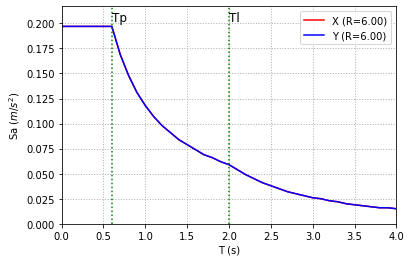

In [159]:
sismo.dinamic_spectrum(report=True)

# Fuerza Cortante Mínima

In [160]:
sismo.min_shear(SapModel,story=sismo.base_story,report=True)

,X,Y
V din (Ton),90.325300,78.021000
V est (Ton),-59.245900,-59.245900
% min,80,80
%,152.460000,131.690000
F.E.,1,1


## Revisión por Piso Blando

In [161]:
sismo.piso_blando(SapModel,report=True)

Dropdown(description='Filtro', options=('SDy Max', 'Sy', 'SDx Max', 'Sx', 'sin filtro'), style=DescriptionStyl…

,Story,OutputCase,UX,UY,ΔUX,ΔUY,VX,VY,lat_rig(k),0.7_prev_k,0.8k_prom,is_reg
0,Story3,SDy Max,0.003666,0.00596,0.001057,0.001629,10.9157,30.9145,18977.593616,0.000000,0.0,Regular
1,Story2,SDy Max,0.002609,0.004331,0.001311,0.002142,21.2111,60.8111,28389.869281,13284.315531,0.0,Regular
2,Story1,SDy Max,0.001298,0.002189,0.001298,0.002189,27.0976,78.021,35642.302421,19872.908497,0.0,Regular


## Revisión por Irregularidad de Masa

In [162]:
sismo.irregularidad_masa(SapModel,report=True)

,Story,Mass,1.5 Mass,story_type,is_regular
0,Story3,8.95254,,Azotea,Regular
1,Story2,13.01653,19.524795,Piso,Regular
2,Story1,13.77887,20.668305,Piso,Regular
3,Base,2.72264,,Sotano,Regular


## Revisión de torsión

In [163]:
sismo.irregularidad_torsion(SapModel,report=True)

Dropdown(description='Filtro', options=('Sx ', 'Sy ', 'SDx Max', 'SDy Max', 'sin filtro'), style=DescriptionSt…

,Story,OutputCase,Direction,Max Drift,Avg Drift,Ratio,Height,Drifts,Drift < Dmax/2,tor_reg
0,Story3,Sx,X,0.002473,0.002278,1.086,3.6,0.014838,False,Regular
6,Story2,Sx,X,0.003055,0.002837,1.077,3.6,0.018330,False,Regular
12,Story1,Sx,X,0.003025,0.002829,1.069,5,0.018150,False,Regular


## Derivas

Dropdown(description='Filtro', options=('Sx ', 'Sy ', 'SDx Max', 'SDy Max', 'sin filtro'), style=DescriptionSt…

,Story,OutputCase,Direction,Height,Drifts,Drift_Check
0,Story3,Sx,X,3.6,0.014838,No Cumple
6,Story2,Sx,X,3.6,0.018330,No Cumple
12,Story1,Sx,X,5,0.018150,No Cumple


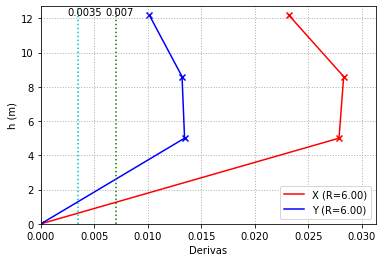

In [167]:
sismo.derivas(SapModel,report=True)

# Desplazamientos Laterales

Dropdown(description='Filtro', options=('Sx ', 'Sy ', 'SDx Max', 'SDy Max', 'sin filtro'), style=DescriptionSt…

,Story,OutputCase,Direction,Maximum,Height
0,Story3,Sx,X,0.008553,3.6
6,Story2,Sx,X,0.00608,3.6
12,Story1,Sx,X,0.003025,5


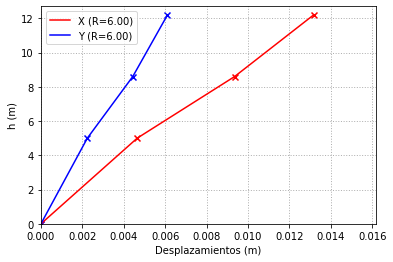

In [178]:
sismo.desplazamientos(SapModel,report=True)

# Centro de Masas e Inercias

In [26]:
#Activar calculate Diaphragm Center of Rigidity en Set Load Cases to Run
sismo.centro_masa_inercia(SapModel,report=True)

,Story,XCCM,XCR,YCCM,YCR,DifX,DifY
0,Story3,3.135,3.135,7.415,7.3571,0.0000,0.0579
1,Story2,3.1397,3.135,7.3457,7.3753,0.0047,-0.0296
2,Story1,3.1408,3.135,7.3286,7.3975,0.0058,-0.0689


# Generación de reporte

In [ ]:
sismo.generate_memoria()